<a href="https://colab.research.google.com/github/kamilakhtar015/Machine-Learning---Concepts-GSU-/blob/main/PCA_Implementation_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Principal Component Analysis')

Principal Component Analysis


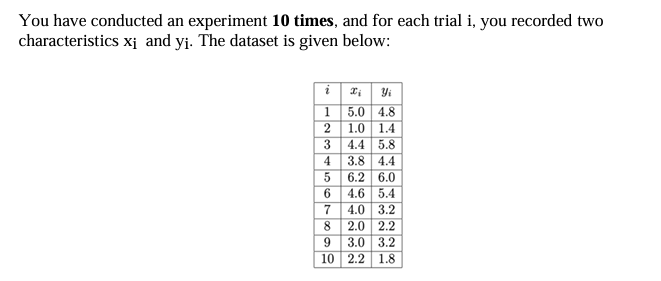


Using Python, Perform a Principal Components Analysis on the set of data. You are supposed to
perform the following steps:

1. Given a dataset with 10 observations, each having two characteristics xi  and yi , visualize
the dataset using a scatter plot.

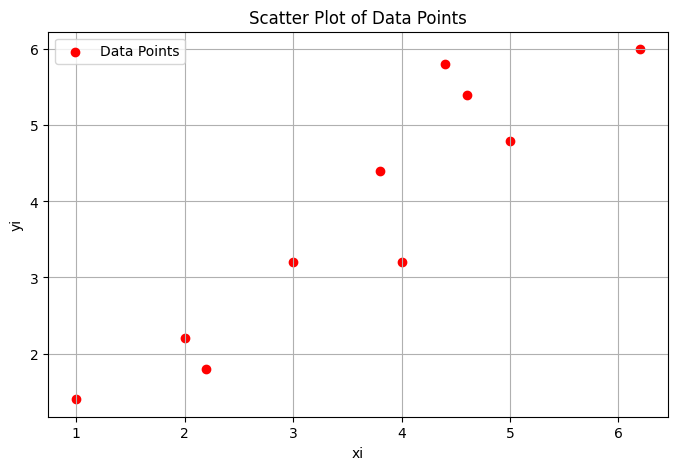

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_ = {
    'xi' : [5.0, 1.0, 4.4, 3.8, 6.2, 4.6, 4.0, 2.0, 3.0, 2.2],
    'yi' : [4.8, 1.4, 5.8, 4.4, 6.0, 5.4, 3.2, 2.2, 3.2, 1.8]
}

data = pd.DataFrame(data_)

plt.figure(figsize=(8,5))
plt.scatter(data['xi'], data['yi'], color='red', label='Data Points')
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.grid(True)
plt.show()

2. Normalize the data by subtracting the mean of each feature to center it around the origin and
plot the normalized data.

    xi   yi
0  5.0  4.8
1  1.0  1.4
2  4.4  5.8
3  3.8  4.4
4  6.2  6.0
5  4.6  5.4
6  4.0  3.2
7  2.0  2.2
8  3.0  3.2
9  2.2  1.8
     xi    yi
0  1.38  0.98
1 -2.62 -2.42
2  0.78  1.98
3  0.18  0.58
4  2.58  2.18
5  0.98  1.58
6  0.38 -0.62
7 -1.62 -1.62
8 -0.62 -0.62
9 -1.42 -2.02


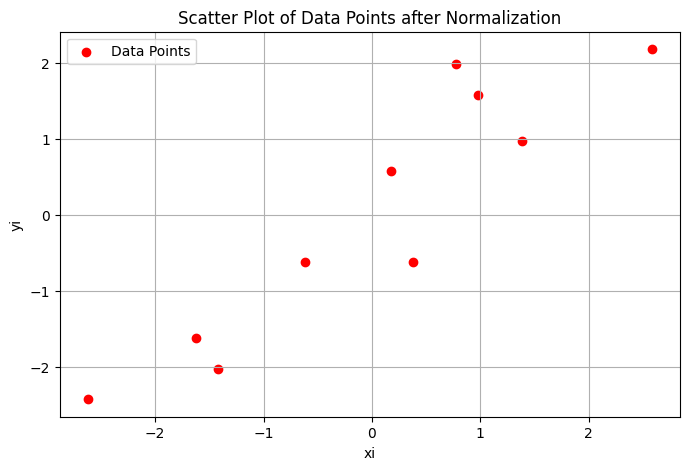

In [3]:
print(data)

xi_mean = data['xi'].mean()
yi_mean = data['yi'].mean()

data['xi'] = data['xi'] - xi_mean
data['yi'] = data['yi'] - yi_mean

print(data)

plt.figure(figsize=(8,5))
plt.scatter(data['xi'], data['yi'], color='red', label='Data Points')
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Scatter Plot of Data Points after Normalization')
plt.legend()
plt.grid(True)
plt.show()

3. Compute the covariance matrix of the normalized dataset.

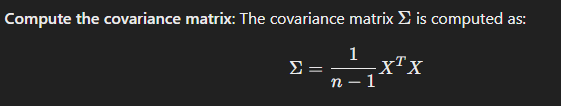

In [4]:
cov_data = np.cov(data, rowvar=False)

cov_data

array([[2.46622222, 2.46177778],
       [2.46177778, 2.86622222]])

In [5]:
#  Or alterna method
tranpose = data.T
res = np.dot(tranpose, data)
cov = res / (data.shape[0] - 1)
cov

array([[2.46622222, 2.46177778],
       [2.46177778, 2.86622222]])

4. Calculate the eigenvalues and eigenvectors of the covariance matrix and print them.

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov_data)

print(f"eigenvalues : {eigenvalues}")
print(f"eigenvector : {eigenvectors}")

eigenvalues : [0.1963336  5.13611085]
eigenvector : [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


5. Select the principal component corresponding to the largest eigenvalue and transform the
data into a lower-dimensional space with one principal component.

In [7]:
# Identify the index of the largest eigenvalue
largest_eigenvalue_index = np.argmax(eigenvalues)

# Get the eigenvector corresponding to the largest eigenvalue
principal_component = eigenvectors[:, largest_eigenvalue_index]

# Project the standardized data onto the principal component
transformed_data = data.dot(principal_component)

transformed_data

,0
0,-1.655940
1,3.555161
2,-1.984395
3,-0.548421
4,-3.351603
5,-1.825898
6,0.198219
7,2.289144
8,0.876092
9,2.447641


6. Project the transformed data back onto the original space using the principal component and
add the original mean to reconstruct an approximation of the original dataset.

In [11]:
# Reshaping the transformed data so it make matrix multiplication compitable
transformed_data_numpy = transformed_data.to_numpy().reshape(-1, 1)
principal_component = principal_component.reshape(1, -1)  # Shape (1,2)

# Projecting the data
reconstructed_data = np.dot(transformed_data_numpy, principal_component)

# Add the original mean back
reconstructed_data += np.array([xi_mean, yi_mean])

# Convert back to DataFrame
reconstructed_df = pd.DataFrame(reconstructed_data, columns=['xi', 'yi'])

print(f"Reconstructed Data (approximation of the original dataset):")
print(reconstructed_df)


Reconstructed Data (approximation of the original dataset):
         xi        yi
0  4.742518  5.037412
1  1.210051  1.206322
2  4.965169  5.278885
3  3.991760  4.223187
4  5.891962  6.284027
5  4.857728  5.162361
6  3.485633  3.674274
7  2.068250  2.137070
8  3.026120  3.175916
9  1.960809  2.020546


7. Plot the reconstructed data and compare it visually with the original dataset using scatter
plots.

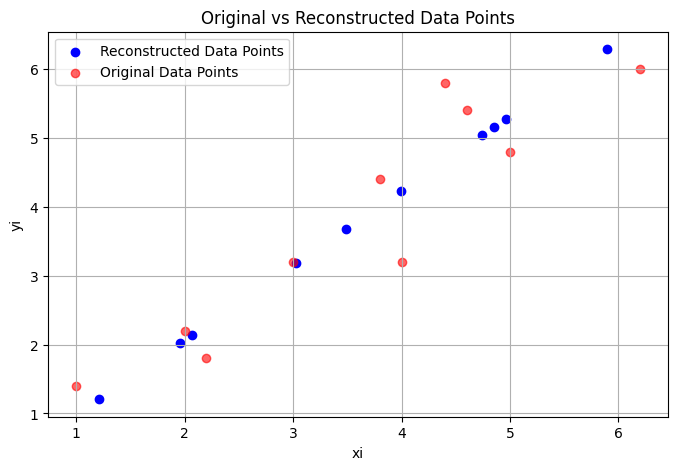

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(reconstructed_df['xi'], reconstructed_df['yi'], color='blue', label='Reconstructed Data Points')
plt.scatter(data_['xi'], data_['yi'], color='red', label='Original Data Points', alpha=0.6)
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Original vs Reconstructed Data Points')
plt.legend()
plt.grid(True)
plt.show()